In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchsampler import ImbalancedDatasetSampler
import matplotlib.pyplot as plt
import os
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from functools import reduce
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import sklearn 
from torch.autograd import Variable
from sklearn.cluster import KMeans

In [2]:
import loaders as l
import models as m
import train_eval as te

In [3]:
import cv2

In [4]:

from ImageClassification import helpers as h
import argparse
import time

In [5]:
saved_model_path='C:/Users/33783/Desktop/start_deep/start_deep/Projet_ML/test_v4'
net = m.BaseNet_v4()
net.load_state_dict(torch.load(saved_model_path))

<All keys matched successfully>

In [11]:
cv2.destroyAllWindows() 
# load the image and define the window width and height
from PIL import Image
from matplotlib import cm
image = cv2.imread("C:/Users/33783/Desktop/start_deep/start_deep/Projet_ML/test.jpg")
(winW, winH) = (36, 36)
transform = transforms.Compose(
    [transforms.Grayscale(), 
     transforms.ToTensor(), 
     transforms.Normalize(mean=(0,),std=(1,))])
face_detected=0
layer=0
color_face=(255,0,0)
color_noFace=(0, 255, 0)
sleep=0.0015
detected_faces=[]
sc=1.2
all_x=[]
all_y=[]
all_layers=[]
all_prob=[]

# loop over the image pyramid
for resized in h.pyramid(image, scale=sc):
    
    # loop over the sliding window for each layer of the pyramid
    
    
    for (x, y, window) in h.sliding_window(resized, stepSize=10, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue

        # THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
        # MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
        # WINDOW
        color=color_noFace
        sleep=0.005

        im = Image.fromarray(window.astype('uint8'), 'RGB')
        im=transform(im)
        im = im.unsqueeze(0)
        outputs=net(im)
        prob=torch.nn.functional.softmax(outputs, dim=1).detach()[0][1].numpy()
        #print(prob)
        y_pred_softmax = torch.log_softmax(outputs, dim = 1)
        _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
        prediction=np.array(y_pred_tags)
 
        new_face=[]
        if prediction==1 and prob>0.9:
            
            face_detected+=1
            #top left corner of the window
            x1=x*pow(sc,layer)
            y1=y*pow(sc,layer)
            #middle of the window
            x2=x1+(winW*pow(sc,layer)/2)
            y2=y1+(winH*pow(sc,layer)/2)
            all_x.append(x2)
            all_y.append(y2)
            all_layers.append(layer)
            all_prob.append(prob)
            
            #print(new_face)
            color=color_face
            sleep=0.5
        
            
        #draw the window
        clone = resized.copy()
        cv2.rectangle(clone, (x, y), (x + winW, y + winH), color, 2)
        cv2.imshow("Window", clone)
        cv2.waitKey(1)
        time.sleep(sleep)
        
    layer+=1
        
print(face_detected)
cv2.waitKey(1)
cv2.destroyAllWindows() 



68


In [12]:
cv2.destroyAllWindows() 

img_clone= image.copy()

for i in range(face_detected) : 

    cv2.rectangle(img_clone, ( int(all_x[i]), int(all_y[i]) ) , ( int(all_x[i]) +int(winW*pow(sc,all_layers[i])), int(all_y[i]) + int(winH*pow(sc,all_layers[i])) ), color_face, 2)
    
    
    #x=all_x[i]+(winW*pow(sc,all_layers[i])/2)
    #y=all_y[i]+(winH*pow(sc,all_layers[i])/2)
    #cv2.circle(image, (int(x), int(y)), 1,color_face, 3)

cv2.imshow("Layer", img_clone)

cv2.waitKey(1)
#cv2.destroyAllWindows() 


-1

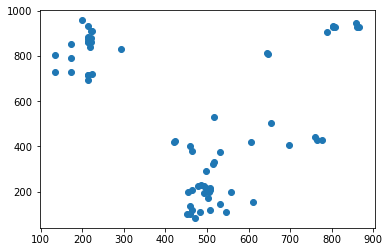

[38, 21, 9]


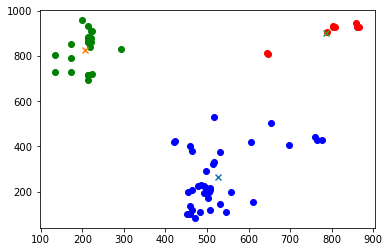

-1

In [15]:
cv2.destroyAllWindows() 
plt.scatter(all_x,all_y)
plt.show()
data_set = np.dstack((all_x,all_y))
data_set = data_set[0]
nb_clusters=3
model = KMeans(nb_clusters,random_state=0).fit(data_set)
points_in_clusters=[0] * nb_clusters

img_clone= image.copy()

for point in data_set:
    
    if model.predict(point.reshape(1,-1)) == [0]:
        plt.scatter(point[0], point[1], c='b')
        points_in_clusters[0]+=1
        
    elif model.predict(point.reshape(1,-1)) == [1]:
        plt.scatter(point[0], point[1], c='g')
        points_in_clusters[1]+=1

    elif model.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')
        points_in_clusters[2]+=1
    '''
    elif model.predict(point.reshape(1,-1)) == [3]:
        plt.scatter(point[0], point[1], c='y')
        points_in_clusters[3]+=1
        
    '''
print(points_in_clusters)
colors=[(255,0,0),(0,255,0),(0,0,255),(55,100,50)]
i=0
for center in model.cluster_centers_:
    
    plt.scatter(center[0],center[1], marker='x')
    #cv2.circle(image, (int(center[0]), int(center[1])),50,color_face, 3)
    cv2.rectangle(img_clone, ( int(center[0])-36, int(center[1])-36 ) , (int(center[0])+36, int(center[1])+36 ), colors[i], 2)
    i+=1
    
plt.show()
cv2.imshow("Layer", img_clone)
cv2.waitKey(1)

In [14]:
cv2.destroyAllWindows() 

-1

In [ ]:
#cv2.destroyAllWindows() 

In [ ]:
from sklearn.cluster import KMeans
p=KMeans(n_clusters=2, random_state=0).fit_predict(points)
plt.scatter(points[:, 0], points[:, 1], c=p)
plt.show()